<h1>Project : Where To Advertise An E-Learning Product ?</h1>

In this project, we’ll aim to find the two best markets to advertise an e-learning product for e-learning companies that offers courses on programming. Most of these courses are on web and mobile development, but also cover other domains, like data science, game development, etc.

We’ll analyze existing data about new coders to find the best markets to invest in for advertising. To make our recommendation, we’ll try to find out:
<ul>
    <li>Where are these new coders located</li>
    <li>Which locations have the greatest number of new coders</li>
    <li>How much money new coders are willing to spend on learning</li>
</ul>

Knowing that we can't organize a survey, we’ll first try to make use of existing data to determine whether we can reach a reliable result. One good candidate for our purpose is freeCodeCamp’s 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for our analysis.

The survey data is publicly available in <a href="https://github.com/freeCodeCamp/2017-new-coder-survey">this GitHub repository</a>. Below, we’ll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned.

<h2> Exploring existing data </h2>

In [6]:
""" import libraries and read file """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#store the file in a dataframe
file = "2017-fCC-New-Coders-Survey-Data.csv"
df = pd.read_csv(file, low_memory=False)
#check the file
pd.options.display.max_columns = 150 # to avoid truncated output df.head()
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We first need to clarify whether the data set has the categories that we need. The <b>JobRoleInterest</b> column describes the role(s) each participant is interested in working in. If a participant is interested in working in a certain domain, we can assume that they’re also interested in learning about that domain. So let’s take a look at the frequency distribution table (summarizes values and their frequency) of this column and determine whether the data we have is relevant.



In [8]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,133.0,132.0,544.0,547.0,481.0,1753.0,7200.000000,3833.000000,4508.000000,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,939.0,584.0,1691.0,6503.000000,16577.000000,17084.000000,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56169.169306,0.227498,0.572981,0.609383,0.420901,0.252463,0.854811,0.269970,0.075511,0.568416,166541.105033,15.609250,43169.357864,0.238083,0.024241,0.250609,0.434674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.771644,957.299753,20.790447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31602.625521,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74811.725422,0.419271,0.494700,0.487952,0.493720,0.434439,0.352302,0.443979,0.264223,0.495336,137761.450348,15.283681,61812.293272,0.425924,0.153802,0.433376,0.495741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419806,5003.003169,41.722826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39383.187732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [2]:
#find the count in percentage
df['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The information in the table above is quite granular, but from a quick scan it looks like:
<ul>
    <li>A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).</li>
    <li> A few people (1.7%) are interested in mobile development.</li>
    <li>Not too many people are interested in domains other than web and mobile development.</li>
</ul> 
   

It’s also interesting to note that many respondents are interested in more than one subject. It’d be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we’ll:
<ul>
    <li>Split each string in the <b>JobRoleInterest</b> column to find the number of options for each participant.</li>
    <li> We’ll first drop the null values because we can’t split Nan values.</li>
    <li> Generate a frequency table for the variable describing the number of options.</li>

<ul>
    
       
   


In [3]:
#Drop null values
interests = df['JobRoleInterest'].dropna()
#split each string in the column
splitted_interests = interests.str.split(',')
# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of the participants have a clear idea about what programming niche they’d like to work in, while the vast majority of students have mixed interests. Given there are courses on various subjects, the fact that new coders have mixed interest might be actually good.

The focus of courses is on web and mobile development, so let’s find out how many respondents chose at least one of these two options.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


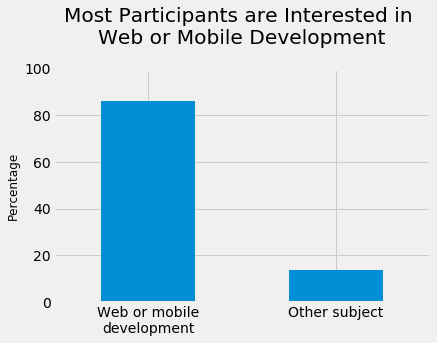

In [4]:
# Frequency table
web_or_mobile = interests.str.contains('Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)
# Graph for the frequency table above
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development', y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()


Most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

<h2> New Coders location and density </h2>

Let’s begin with finding out where these new coders are located, and the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets in which to run our ads campaign.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the <b>CountryLive</b> variable, which describes what country each participant lives in (not their origin country). We’ll only consider those participants who answered what role(s) they’re interested in, to make sure we work with a representative sample.

In [5]:
# Isolate the participants that answered what role they'd be interested in
df_good = df[df['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_frequencies = df_good['CountryLive'].value_counts()
relative_frequencies = df_good['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies,
                      'Percentage': relative_frequencies}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Botswana,1,0.014624
Turkmenistan,1,0.014624
Gibraltar,1,0.014624
Mozambique,1,0.014624


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it’s just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

<h2>Spending money for learning</h2>

The <b>MoneyForLearning</b> column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. We’ll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each. Let’s start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we’ll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we’ll replace 0 with 1 in the MonthsProgramming column.

In [6]:
#replace 0 by 1  to avoid error during division
df_good['MonthsProgramming'].replace(0,1,inplace= True)
# New column for the amount of money each student spends each month
df_good['money_per_month'] = df_good['MoneyForLearning'] / df_good['MonthsProgramming']
df_good['money_per_month'].isnull().sum()


675

Let’s keep only the rows that don’t have null values for the money_per_month column.

In [7]:
# Keep only the rows with non-nulls in the `money_per_month` column 
df_good = df_good[df_good['money_per_month'].notnull()]

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let’s remove the rows having null values for the <b>CountryLive</b> column, and check out if we still have enough data for the four countries that interest us.

In [8]:
# Remove the rows with null values in 'CountryLive'
df_good = df_good[df_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
df_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough, so let’s compute the average value spent per month in each country by a student. We’ll compute the average using the mean.

In [13]:
# Mean sum of money spent by students each month
countries_mean = df_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we’d intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don’t have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

<h2>Dealing with extreme Outliers</h2>

Let’s use box plots to visualize the distribution of the <b>money_per_month</b> variable for each country.

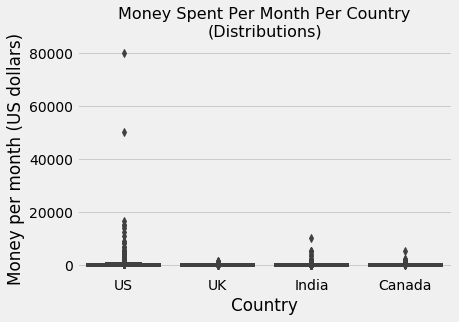

In [14]:
# Isolate only the countries of interest
only_4 = df_good[df_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It’s hard to see on the plot above if there’s anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there’s something really off for the US: it says two persons spend 50000 or more each month for learning. This is not impossible, but it seems extremely unlikely, so we’ll remove every value that goes over 20000 per month.

In [15]:
# Isolate only those participants who spend less than 10000 per month
df_good = df_good[df_good['money_per_month'] < 20000]

Now let’s recompute the mean values and plot the box plots again.

In [16]:
# Recompute mean sum of money spent by students each month
countries_mean = df_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

([<matplotlib.axis.XTick at 0x7fea2fc496d0>,
 <a list of 4 Text xticklabel objects>)

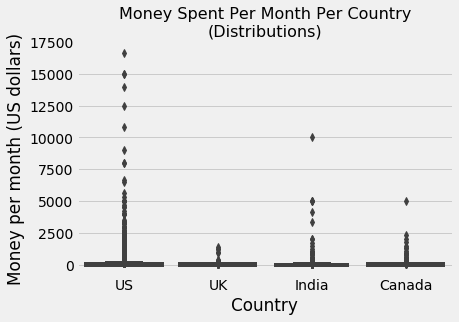

In [17]:
# Isolate again the countries of interest
only_4 = df_good[df_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
# avoids tick labels overlapplt.show()

<h2>Choosing the two best advertising markets</h2>

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $183). It’s not crystal clear what to choose between Canada and India for second market. 

At this point, it seems that we have several options:
<ol>
    <li>
        Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
        <ul>
            <li>60% for the US, 25% for India, 15% for Canada.</li>
            <li>50% for the US, 30% for India, 20% for Canada; etc.</li>
        </ul>       
    </li>
    <li>
        Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
        <ul>
            <li>70% for the US, and 30% for India.</li>
            <li>65% for the US, and 35% for Canada; etc.</li>
        </ul>       
    </li>
    <li>
        Advertise only in the US.
    </li>
</ol>
        
        
    
        
       

